In [12]:
from gensim.models import Word2Vec, FastText
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [13]:
# path data
pathdata = 'datatrain.txt'

def read_data(path):
    traindata = []
    sents = open(pathdata, 'r').readlines()
    for sent in sents:
        traindata.append(sent.split())
    return traindata
train_data = read_data(pathdata)

In [14]:
# model_word2vec = Word2Vec(train_data, vector_size=150, window=10, min_count=2, workers=4, sg=0)
# model_word2vec.wv.save("model/word2vec_skipgram.model")

In [15]:
# model_fasttext = FastText(vector_size=150, window=10, min_count=2, workers=4, sg=1)
# model_fasttext.build_vocab(train_data)
# model_fasttext.train(train_data, total_examples=model_fasttext.corpus_count, epochs=20)

# model_fasttext.wv.save("model/fasttext_gensim.model")


In [23]:
# demo
model = KeyedVectors.load('model/word2vec_skipgram.model')
result = []
for word in model.most_similar(u"vợ"):
    result.append(' '.join(word[0].split('_')))
    print(word[0])
','.join(result)

con_gái
con_trai
cha
chị
em_gái
em
anh_trai
cháu
em_trai
công_chúa


'con gái,con trai,cha,chị,em gái,em,anh trai,cháu,em trai,công chúa'

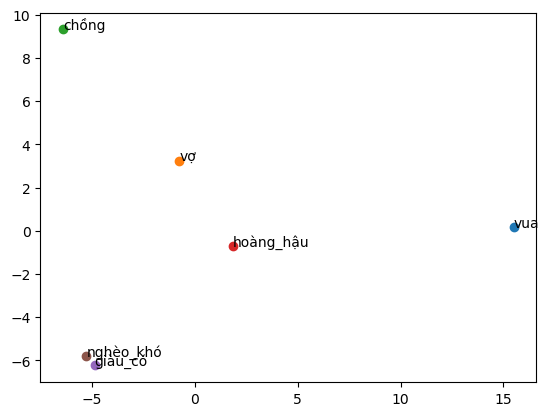

In [29]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

model = KeyedVectors.load('model/word2vec_skipgram.model')
# model = KeyedVectors.load('../model/fasttext_gensim.model')

pathfile = './words'
with open(pathfile, 'r') as f:
    words = f.readlines()
    words = [word.strip() for word in words]

words_np = []
words_label = []

for word in model.key_to_index.keys():
    if word in words:
        words_np.append(model[word])
        words_label.append(word)

pca = PCA(n_components=2)
pca.fit(words_np)
reduced = pca.transform(words_np)


def visualize():
    fig, ax = plt.subplots()

    for index, vec in enumerate(reduced):
        x, y = vec[0], vec[1]

        ax.scatter(x, y)
        ax.annotate(words_label[index], xy=(x, y))

    plt.show()
    return



visualize()
